In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import arrow
import boxball_loader as bbl

In [2]:
bat_yrs = bbl.load_batting(years=range(2000, 3000), player_types=bbl.PlayerType.POSITION, coalesce_type=bbl.CoalesceMode.PLAYER_SEASON)
bat_yrs.shape

(13155, 17)

In [3]:
bat_yrs.sample(10)

,,g,ab,r,h,_2b,_3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
player_id,yr,,,,,,,,,,,,,,,,,
valenje01,2018,46,79,8,14,5,1,1,6.0,0.0,0.0,8,24.0,0.0,1.0,0.0,1.0,1.0
leede02,2005,158,594,120,199,50,3,46,107.0,15.0,3.0,85,109.0,23.0,5.0,0.0,7.0,12.0
cabreme01,2014,139,568,81,171,35,3,16,73.0,6.0,2.0,43,67.0,3.0,3.0,2.0,5.0,19.0
clarkje02,2001,3,0,1,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
hafnetr01,2010,118,396,46,110,29,0,13,50.0,2.0,1.0,51,94.0,10.0,12.0,0.0,3.0,2.0
whitety01,2018,66,210,27,58,12,3,12,42.0,0.0,1.0,24,49.0,0.0,2.0,0.0,1.0,1.0
allench01,2000,15,50,2,15,3,0,0,7.0,0.0,2.0,3,14.0,0.0,1.0,0.0,1.0,1.0
uribeju01,2009,122,398,50,115,26,4,16,55.0,3.0,1.0,25,82.0,2.0,1.0,3.0,5.0,7.0
liniaco01,2000,3,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0


In [4]:
birthdate_cols = ['birth_year', 'birth_month', 'birth_day']
def compute_birthdate(person):
    return arrow.Arrow(*[int(person[col]) for col in birthdate_cols]).date()

birthdates = bbl.load_people().set_index('player_id')[birthdate_cols].dropna().apply(compute_birthdate, axis=1).rename('birthdate')
birthdates.sample(10)

player_id
whitero01    1943-12-27
denmabr01    1956-02-12
obrieto01    1860-06-22
huntebu01    1947-08-09
bushgu01     1901-08-23
sutkogl01    1968-05-09
brucelo01    1877-01-16
decindo01    1950-08-29
crottmi01    1984-09-25
crispjo01    1885-07-08
Name: birthdate, dtype: object

In [5]:
batters = pd.merge(left=bat_yrs.reset_index().set_index('player_id'), right=birthdates, on='player_id')
batters

,yr,g,ab,r,h,_2b,_3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,birthdate
player_id,,,,,,,,,,,,,,,,,,,
abadan01,2001,1,1,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1972-08-25
abadan01,2003,9,17,1,2,0,0,0,0.0,0.0,1.0,2,5.0,0.0,0.0,0.0,0.0,1.0,1972-08-25
abadan01,2006,5,3,0,0,0,0,0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1972-08-25
abbotje01,2000,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,1972-08-17
abbotje01,2001,28,42,5,11,3,0,0,5.0,0.0,0.0,3,7.0,0.0,1.0,0.0,0.0,1.0,1972-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuninmi01,2016,55,164,16,34,7,0,12,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0,1991-03-25
zuninmi01,2017,124,387,52,97,25,0,25,64.0,1.0,0.0,39,160.0,0.0,8.0,0.0,1.0,8.0,1991-03-25
zuninmi01,2018,113,373,37,75,18,0,20,44.0,0.0,0.0,24,150.0,0.0,6.0,0.0,2.0,7.0,1991-03-25


In [6]:
def compute_age(b):
    return (arrow.Arrow(b.yr,7,1).date()-b['birthdate']).days/365.24

In [7]:
batters['age'] = batters.apply(compute_age, axis=1)
batters['age_int'] = batters.age.astype(int)
batters.sample(10)

,yr,g,ab,r,h,_2b,_3b,hr,rbi,sb,...,bb,so,ibb,hbp,sh,sf,gidp,birthdate,age,age_int
player_id,,,,,,,,,,,,,,,,,,,,,
callaal01,2006,23,42,2,10,1,1,0,6.0,0.0,...,4,6.0,0.0,0.0,0.0,1.0,0.0,1983-04-19,23.201183,23
iannech01,2009,93,289,41,66,15,2,16,52.0,0.0,...,43,75.0,3.0,11.0,1.0,6.0,4.0,1983-04-08,26.232067,26
vottojo01,2011,161,599,101,185,40,3,29,103.0,8.0,...,110,129.0,15.0,4.0,0.0,6.0,20.0,1983-09-10,27.806374,27
doziebr01,2018,151,553,81,119,30,2,21,72.0,12.0,...,70,129.0,1.0,4.0,0.0,5.0,12.0,1987-05-15,31.130216,31
liddial01,2012,38,116,8,26,4,1,3,10.0,2.0,...,9,49.0,0.0,0.0,0.0,1.0,0.0,1988-08-14,23.880188,23
ugglada01,2014,52,141,14,21,3,0,2,10.0,0.0,...,11,46.0,0.0,4.0,0.0,1.0,3.0,1980-03-11,34.306210,34
dahlda01,2016,63,222,42,70,12,4,7,24.0,5.0,...,15,59.0,0.0,0.0,0.0,0.0,3.0,1994-04-01,22.251123,22
rasmuco01,2011,129,471,75,106,24,6,14,53.0,5.0,...,50,116.0,2.0,0.0,2.0,3.0,10.0,1986-08-11,24.887745,24
boteda01,2020,45,125,15,25,3,1,7,29.0,2.0,...,17,40.0,0.0,2.0,0.0,1.0,6.0,1993-04-07,27.234147,27


In [8]:
batters['pa'] = batters.ab + batters.bb + batters.hbp + batters.sh + batters.sf - batters.ibb
batters['uibb'] = batters.bb - batters.ibb
batters['bb_rate'] = batters.uibb/batters.pa
batters.sample(10)

,yr,g,ab,r,h,_2b,_3b,hr,rbi,sb,...,hbp,sh,sf,gidp,birthdate,age,age_int,pa,uibb,bb_rate
player_id,,,,,,,,,,,,,,,,,,,,,
terrelu01,2003,5,4,0,1,0,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,1980-05-18,23.119045,23,5.0,0.0,0.000000
macrima01,2008,18,34,3,11,1,0,1,4.0,1.0,...,0.0,0.0,0.0,0.0,1982-05-29,26.092432,26,36.0,2.0,0.055556
belljo02,2020,57,195,22,44,3,0,8,22.0,0.0,...,2.0,0.0,4.0,3.0,1992-08-14,27.880298,27,219.0,18.0,0.082192
freelry01,2001,9,22,1,6,1,0,0,3.0,2.0,...,1.0,0.0,0.0,0.0,1976-03-08,25.314861,25,24.0,1.0,0.041667
mackoro01,2004,155,491,65,121,22,6,17,75.0,13.0,...,6.0,1.0,7.0,3.0,1976-06-20,28.030884,28,553.0,48.0,0.086799
lindofr01,2016,158,604,99,182,30,3,15,78.0,19.0,...,5.0,3.0,15.0,18.0,1993-11-14,22.628956,22,681.0,54.0,0.079295
murphda08,2011,109,391,49,125,28,2,6,49.0,5.0,...,3.0,3.0,2.0,14.0,1985-04-01,26.248494,26,421.0,22.0,0.052257
buterdr01,2014,61,170,16,32,6,1,3,14.0,0.0,...,2.0,1.0,2.0,1.0,1983-08-09,30.894754,30,191.0,16.0,0.083770
estrajo01,2001,89,298,26,68,15,0,8,37.0,0.0,...,4.0,2.0,4.0,15.0,1976-06-27,25.010952,25,318.0,10.0,0.031447


<AxesSubplot:xlabel='age', ylabel='bb_rate'>

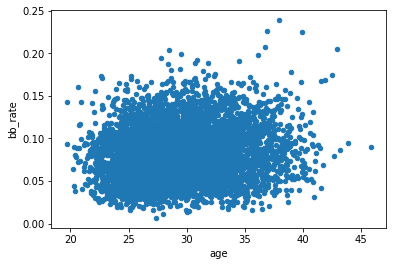

In [9]:
batters.query('pa>=300').plot.scatter(x='age', y='bb_rate')

<AxesSubplot:xlabel='age_int'>

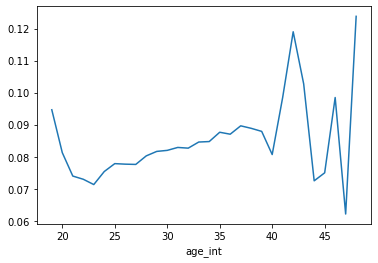

In [10]:
by_age = batters[batters['pa']>=100].groupby(['age_int']).sum()
(by_age.uibb/by_age.pa).plot()

In [11]:
# Use this to compute year-average BB rate, over non-pitchers
yr_totals = batters.groupby('yr')[['pa', 'uibb']].sum()
yr_totals['bb_rt'] = yr_totals['uibb']/yr_totals['pa']
yr_totals

,pa,uibb,bb_rt
yr,,,
2000,182726.0,16805.0,0.091968
2001,179480.0,14238.0,0.079329
2002,179100.0,14605.0,0.081547
2003,180041.0,14380.0,0.079871
2004,181061.0,14643.0,0.080873
2005,178931.0,13802.0,0.077136
2006,180595.0,14237.0,0.078834
2007,181323.0,14575.0,0.080381
2008,180326.0,14794.0,0.082040


<AxesSubplot:xlabel='yr'>

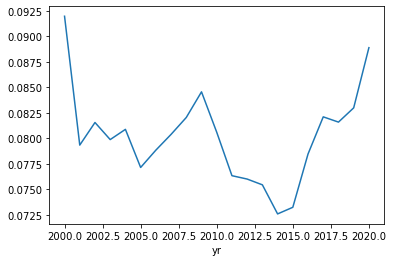

In [12]:
yr_totals.bb_rt.plot()

In [13]:
# Normalize walk rates to average for the year 

bat_yrs = pd.merge(left=batters, right=yr_totals['bb_rt'].rename('lg_bb_rt'), on='yr')[['player_id', 'yr', 'pa', 'uibb', 'bb_rate', 'age', 'age_int', 'lg_bb_rt']]
bat_yrs['bb_rt+'] = bat_yrs['bb_rate']/bat_yrs['lg_bb_rt']
bat_yrs.sample(10)

KeyError: "['player_id'] not in index"

In [ ]:
def get_pairs_consecutive_seasons(seasons, min_pa):
    s = seasons.loc[seasons.pa>=min_pa]
    pairs = pd.merge(left=s, right=s, on='player_id')
    cons_pairs = pairs.loc[(pairs.yr_y-pairs.yr_x==1)]
    return cons_pairs
    

In [ ]:
pairs = get_pairs_consecutive_seasons(bat_yrs, 300)
pairs

,player_id,yr_x,pa_x,uibb_x,bb_rate_x,age_x,age_int_x,lg_bb_rt_x,bb_rt+_x,yr_y,pa_y,uibb_y,bb_rate_y,age_y,age_int_y,lg_bb_rt_y,bb_rt+_y
1,abernbr01,2001,334.0,26.0,0.077844,23.770671,23,0.079329,0.981282,2002,504.0,25.0,0.049603,24.770014,24,0.081547,0.608280
10,abreubo01,2001,693.0,95.0,0.137085,27.308071,27,0.079329,1.728055,2002,676.0,95.0,0.140533,28.307414,28,0.081547,1.723340
24,abreubo01,2003,682.0,96.0,0.140762,29.306757,29,0.079871,1.762379,2004,703.0,117.0,0.166430,30.308838,30,0.080873,2.057905
32,abreubo01,2006,680.0,118.0,0.173529,32.307524,32,0.078834,2.201204,2007,699.0,84.0,0.120172,33.306867,33,0.080381,1.495018
40,abreubo01,2000,671.0,91.0,0.135618,26.308729,26,0.091968,1.474622,2001,693.0,95.0,0.137085,27.308071,27,0.079329,1.728055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39799,rosaram01,2018,588.0,25.0,0.042517,22.612529,22,0.081585,0.521135,2019,653.0,29.0,0.044410,23.611872,23,0.082983,0.535175
39803,smithma05,2018,544.0,47.0,0.086397,25.153324,25,0.081585,1.058978,2019,566.0,42.0,0.074205,26.152667,26,0.082983,0.894219
39807,sotoju01,2018,484.0,69.0,0.142562,19.682948,19,0.081585,1.747397,2019,656.0,105.0,0.160061,20.682291,20,0.082983,1.928841
39811,torregl01,2018,481.0,39.0,0.081081,21.547476,21,0.081585,0.993819,2019,601.0,45.0,0.074875,22.546819,22,0.082983,0.902296


In [ ]:
pairs.player_id.value_counts()

pujolal01    18
beltrad01    18
ortizda01    16
beltrca01    15
hunteto01    15
             ..
stynech01     1
moncayo01     1
deverra01     1
simonra01     1
jonesja07     1
Name: player_id, Length: 869, dtype: int64

In [ ]:
pairs.columns.values

array(['player_id', 'yr_x', 'pa_x', 'uibb_x', 'bb_rate_x', 'age_x',
       'age_int_x', 'lg_bb_rt_x', 'bb_rt+_x', 'yr_y', 'pa_y', 'uibb_y',
       'bb_rate_y', 'age_y', 'age_int_y', 'lg_bb_rt_y', 'bb_rt+_y'],
      dtype=object)

In [ ]:
X = pairs['bb_rate_x']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bb_rate_y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4936.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        23:37:46   Log-Likelihood:                 9620.1
No. Observations:                3886   AIC:                        -1.924e+04
Df Residuals:                    3884   BIC:                        -1.922e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.001     22.328      0.000       0.019       0.023
bb_rate_x      0.7485      0.011     70.259      0.000       0.728       0.769
==============================================================================
Omnibus:                       84.096   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.845
Skew:                           0.327   Prob(JB):                     4.19e-21
Kurtosis:                       3.390   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

const        0.020711
bb_rate_x    0.748467
dtype: float64

In [ ]:
def run_regression(batters, min_pa):
    pairs = get_pairs_consecutive_seasons(batters, min_pa)
    X = pairs['bb_rate_x']
    y = pairs['bb_rate_y']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    ret = model.params
    ret['r2'] = model.rsquared_adj
    return ret 
    

In [ ]:
run_regression(batters, 500)

const        0.018715
bb_rate_x    0.780370
r2           0.607896
dtype: float64

In [ ]:
pd.DataFrame.from_dict({min_pa: run_regression(batters, min_pa) for min_pa in (1, 100, 300, 500)}).T

,const,bb_rate_x,r2
1,0.049830,0.349210,0.112757
100,0.026410,0.671561,0.447271
300,0.020711,0.748467,0.559540
500,0.018715,0.780370,0.607896


In [ ]:
# OK, let's compute predictions for these pairs.  Then we'll look at over-underperformance by age
pairs = get_pairs_consecutive_seasons(batters, 300)
X = pairs['bb_rate_x']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
pairs['bb_rate_y_predicted'] = model.predict(X)
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,gidp_y,birth_year_y,birth_month_y,birth_day_y,age_y,age_int_y,pa_y,uibb_y,bb_rate_y,bb_rate_y_predicted
1,abernbr01,2001,79,304,43,82,17,1,5,33.0,...,8.0,1977.0,9.0,23.0,24.770014,24,504.0,25.0,0.049603,0.078975
5,abreubo01,2000,154,576,103,182,42,10,25,79.0,...,13.0,1974.0,3.0,11.0,27.308071,27,693.0,95.0,0.137085,0.122217
18,abreubo01,2001,162,588,118,170,48,4,31,110.0,...,11.0,1974.0,3.0,11.0,28.307414,28,676.0,95.0,0.140533,0.123315
31,abreubo01,2002,157,572,102,176,50,6,20,85.0,...,13.0,1974.0,3.0,11.0,29.306757,29,682.0,96.0,0.140762,0.125895
44,abreubo01,2003,158,577,99,173,35,1,20,101.0,...,5.0,1974.0,3.0,11.0,30.308838,30,703.0,117.0,0.166430,0.126067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39848,zobribe01,2015,126,467,76,129,36,3,13,56.0,...,17.0,1981.0,5.0,26.0,35.100208,35,625.0,90.0,0.144000,0.103718
39859,zobribe01,2016,147,523,94,142,31,3,18,76.0,...,13.0,1981.0,5.0,26.0,36.099551,36,494.0,52.0,0.105263,0.128491
39870,zobribe01,2017,128,435,58,101,20,3,12,50.0,...,8.0,1981.0,5.0,26.0,37.098894,37,519.0,54.0,0.104046,0.099497
39882,zuninmi01,2014,131,438,51,87,20,2,22,60.0,...,6.0,1991.0,3.0,25.0,24.268974,24,386.0,21.0,0.054404,0.045923


In [ ]:
pairs['bb_rate_overperform'] = pairs.bb_rate_y/pairs.bb_rate_y_predicted
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,birth_year_y,birth_month_y,birth_day_y,age_y,age_int_y,pa_y,uibb_y,bb_rate_y,bb_rate_y_predicted,bb_rate_overperform
1,abernbr01,2001,79,304,43,82,17,1,5,33.0,...,1977.0,9.0,23.0,24.770014,24,504.0,25.0,0.049603,0.078975,0.628085
5,abreubo01,2000,154,576,103,182,42,10,25,79.0,...,1974.0,3.0,11.0,27.308071,27,693.0,95.0,0.137085,0.122217,1.121651
18,abreubo01,2001,162,588,118,170,48,4,31,110.0,...,1974.0,3.0,11.0,28.307414,28,676.0,95.0,0.140533,0.123315,1.139622
31,abreubo01,2002,157,572,102,176,50,6,20,85.0,...,1974.0,3.0,11.0,29.306757,29,682.0,96.0,0.140762,0.125895,1.118091
44,abreubo01,2003,158,577,99,173,35,1,20,101.0,...,1974.0,3.0,11.0,30.308838,30,703.0,117.0,0.166430,0.126067,1.320163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39848,zobribe01,2015,126,467,76,129,36,3,13,56.0,...,1981.0,5.0,26.0,35.100208,35,625.0,90.0,0.144000,0.103718,1.388380
39859,zobribe01,2016,147,523,94,142,31,3,18,76.0,...,1981.0,5.0,26.0,36.099551,36,494.0,52.0,0.105263,0.128491,0.819228
39870,zobribe01,2017,128,435,58,101,20,3,12,50.0,...,1981.0,5.0,26.0,37.098894,37,519.0,54.0,0.104046,0.099497,1.045719
39882,zuninmi01,2014,131,438,51,87,20,2,22,60.0,...,1991.0,3.0,25.0,24.268974,24,386.0,21.0,0.054404,0.045923,1.184685


,bb_rate_overperform,pa_y
age_int_y,,
20,1.263943,1149.0
21,1.095492,6977.0
22,1.021290,19694.0
23,0.961503,53090.0
24,1.010175,94252.0
25,1.017878,139236.0
26,0.993037,192685.0
27,1.001093,204863.0
28,0.999051,203620.0


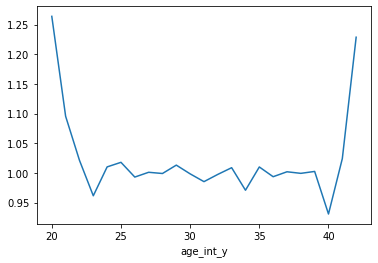

In [ ]:
bb_age_curve = pairs.groupby('age_int_y').agg({'bb_rate_overperform': np.mean, 'pa_y': np.sum})
bb_age_curve.bb_rate_overperform.plot()
bb_age_curve

In [ ]:
# Now let's apply the age adjustments to the predictions, and see what we see
pairs = pd.merge(left=pairs, right=bb_age_curve.bb_rate_overperform.rename('bb_rate_age_adjust'), on='age_int_y')
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,birth_month_y,birth_day_y,age_y,age_int_y,pa_y,uibb_y,bb_rate_y,bb_rate_y_predicted,bb_rate_overperform,bb_rate_age_adjust
0,abernbr01,2001,79,304,43,82,17,1,5,33.0,...,9.0,23.0,24.770014,24,504.0,25.0,0.049603,0.078975,0.628085,1.010175
1,ackledu01,2011,90,333,39,91,16,7,6,36.0,...,2.0,26.0,24.345636,24,661.0,52.0,0.078669,0.098552,0.798246,1.010175
2,almoral01,2017,132,299,39,89,18,1,8,46.0,...,4.0,16.0,24.208739,24,478.0,23.0,0.048117,0.062551,0.769245,1.010175
3,altuvjo01,2013,152,626,64,177,31,2,5,52.0,...,5.0,6.0,24.153981,24,700.0,29.0,0.041429,0.051009,0.812180,1.010175
4,anderti01,2016,99,410,57,116,22,6,9,30.0,...,6.0,23.0,24.022561,24,606.0,13.0,0.021452,0.043287,0.495580,1.010175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,bondsba01,2006,130,367,74,99,23,0,26,77.0,...,7.0,24.0,42.936152,42,434.0,89.0,0.205069,0.147375,1.391478,1.228755
3882,henderi01,2000,123,420,75,98,14,2,4,32.0,...,12.0,25.0,42.517249,42,465.0,81.0,0.174194,0.146419,1.189691,1.228755
3883,suzukic01,2015,153,398,45,91,5,6,1,21.0,...,10.0,22.0,42.692476,42,364.0,29.0,0.079670,0.072094,1.105097,1.228755
3884,harpebr03,2012,139,533,98,144,26,9,22,59.0,...,10.0,16.0,20.706932,20,493.0,57.0,0.115619,0.090919,1.271662,1.263943


In [ ]:
pairs['bb_rate_y_age_predicted'] = pairs.bb_rate_y_predicted * pairs.bb_rate_age_adjust
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,birth_day_y,age_y,age_int_y,pa_y,uibb_y,bb_rate_y,bb_rate_y_predicted,bb_rate_overperform,bb_rate_age_adjust,bb_rate_y_age_predicted
0,abernbr01,2001,79,304,43,82,17,1,5,33.0,...,23.0,24.770014,24,504.0,25.0,0.049603,0.078975,0.628085,1.010175,0.079779
1,ackledu01,2011,90,333,39,91,16,7,6,36.0,...,26.0,24.345636,24,661.0,52.0,0.078669,0.098552,0.798246,1.010175,0.099555
2,almoral01,2017,132,299,39,89,18,1,8,46.0,...,16.0,24.208739,24,478.0,23.0,0.048117,0.062551,0.769245,1.010175,0.063188
3,altuvjo01,2013,152,626,64,177,31,2,5,52.0,...,6.0,24.153981,24,700.0,29.0,0.041429,0.051009,0.812180,1.010175,0.051528
4,anderti01,2016,99,410,57,116,22,6,9,30.0,...,23.0,24.022561,24,606.0,13.0,0.021452,0.043287,0.495580,1.010175,0.043727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,bondsba01,2006,130,367,74,99,23,0,26,77.0,...,24.0,42.936152,42,434.0,89.0,0.205069,0.147375,1.391478,1.228755,0.181088
3882,henderi01,2000,123,420,75,98,14,2,4,32.0,...,25.0,42.517249,42,465.0,81.0,0.174194,0.146419,1.189691,1.228755,0.179913
3883,suzukic01,2015,153,398,45,91,5,6,1,21.0,...,22.0,42.692476,42,364.0,29.0,0.079670,0.072094,1.105097,1.228755,0.088585
3884,harpebr03,2012,139,533,98,144,26,9,22,59.0,...,16.0,20.706932,20,493.0,57.0,0.115619,0.090919,1.271662,1.263943,0.114917


In [ ]:
pairs['bb_rate_age_overperform'] = pairs.bb_rate_y/pairs.bb_rate_y_age_predicted
pairs.groupby('age_int_y').bb_rate_age_overperform.mean()


age_int_y
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
Name: bb_rate_age_overperform, dtype: float64

In [ ]:
# OK, that didn't tell us much of anything
# Let's instead look at the r-squareds of the predictions
X = pairs['bb_rate_y_predicted']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bb_rate_y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4936.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        23:37:47   Log-Likelihood:                 9620.1
No. Observations:                3886   AIC:                        -1.924e+04
Df Residuals:                    3884   BIC:                        -1.922e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.828e-17      0.001   6.48e-14      1.000      -0.002       0.002
bb_rate_y_predicted     1.0000      0.014     70.259      0.000       0.972       1.028
==============================================================================
Omnibus:                       84.096   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.845
Skew:                           0.327   Prob(JB):                     4.19e-21
Kurtosis:                       3.390   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Yeah, that's the same as before.  Now try the age-adjusted prediction:
X = pairs['bb_rate_y_age_predicted']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bb_rate_y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     4988.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        23:37:47   Log-Likelihood:                 9631.5
No. Observations:                3886   AIC:                        -1.926e+04
Df Residuals:                    3884   BIC:                        -1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.019e-05      0.001      0.025      0.980      -0.002       0.002
bb_rate_y_age_predicted     1.0001      0.014     70.626      0.000       0.972       1.028
==============================================================================
Omnibus:                       85.538   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.880
Skew:                           0.328   Prob(JB):                     1.51e-21
Kurtosis:                       3.401   Cond. No.                         43.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""